In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils

# CIFAR-10データを読み込む
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# 画像データをfloat32(浮動小数点数)型に変換
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 訓練用とテスト用の画像データを標準化する
# 4次元テンソルのすべての軸方向に対して平均、標準偏差を求めるので
# axis=(0,1,2,3)は省略してもよい
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
# 標準化する際に分母の標準偏差に極小値を加える
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

# 分類先のクラスの数
num_classes = 10
# 正解ラベルをワンホット表現に変換
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras import optimizers

# ハイパーパラメーターの値を設定
weight_decay = 1e-4

# CNNを構築
model = Sequential()

# (第1層)畳み込み層1 正則化を行う
model.add(
    Conv2D(
        filters=32,                    # フィルターの数は32
        kernel_size=(3,3),             # 3×3のフィルターを使用
        input_shape=x_train.shape[1:], # 入力データの形状
        padding='same',                # ゼロパディングを行う 
        kernel_regularizer=regularizers.l2(weight_decay),
        activation='relu'              # 活性化関数はReLU
        ))
# 正規化
model.add(BatchNormalization())

# (第2層)畳み込み層2　正則化を行う
model.add(
    Conv2D(filters=32,                 # フィルターの数は32
           kernel_size=(3,3),          # 3×3のフィルターを使用
           padding='same',             # ゼロパディングを行う 
           kernel_regularizer=regularizers.l2(weight_decay),
           activation='relu'           # 活性化関数はReLU
           ))
# 正規化
model.add(BatchNormalization())

# (第3層)プーリング層1：ウィンドウサイズは2×2
model.add(
    MaxPooling2D(pool_size=(2,2)))
# ドロップアウト1：ドロップアウトは20％
model.add(Dropout(0.2))
 
# (第4層)畳み込み層3　正則化を行う
model.add(
    Conv2D(filters=64,                 # フィルターの数は32
           kernel_size=(3,3),          # 3×3のフィルターを使用
           padding='same',             # ゼロパディングを行う 
           kernel_regularizer=regularizers.l2(weight_decay),
           activation='relu'           # 活性化関数はReLU
           ))

# 正規化
model.add(BatchNormalization())

# (第5層)畳み込み層3　正則化を行う
model.add(
    Conv2D(filters=64,                 # フィルターの数は32
           kernel_size=(3,3),          # 3×3のフィルターを使用
           padding='same',             # ゼロパディングを行う 
           kernel_regularizer=regularizers.l2(weight_decay),
           activation='relu'           # 活性化関数はReLU
           ))
# 正規化
model.add(BatchNormalization())

# (第6層)プーリング層2：ウィンドウサイズは2×2
model.add(
    MaxPooling2D(pool_size=(2,2)))
# ドロップアウト2：ドロップアウトは30％
model.add(Dropout(0.3))
 
# (第6層)畳み込み層4　正則化を行う
model.add(
    Conv2D(filters=128,                # フィルターの数は128
           kernel_size=(3,3),          # 3×3のフィルターを使用
           padding='same',             # ゼロパディングを行う 
           kernel_regularizer=regularizers.l2(weight_decay),
           activation='relu'           # 活性化関数はReLU
          ))
# 正規化
model.add(BatchNormalization())

# (第7層)畳み込み層5　正則化を行う
model.add(
    Conv2D(filters=128,                # フィルターの数は128
           kernel_size=(3,3),          # 3×3のフィルターを使用
           padding='same',             # ゼロパディングを行う 
           kernel_regularizer=regularizers.l2(weight_decay),
           activation='relu'           # 活性化関数はReLU
          ))
# 正規化
model.add(BatchNormalization())

# (第8層)プーリング層3：ウィンドウサイズは2×2
model.add(
    MaxPooling2D(pool_size=(2,2)))
# ドロップアウト2：ドロップアウトは40％
model.add(Dropout(0.4))
 
# Flatten層　4階テンソルから2階テンソルに変換
model.add(Flatten())

# （第9層）出力層
model.add(
    Dense(num_classes,           # 出力層のニューロン数はnum_classes
          activation='softmax')) # 活性化関数はソフトマックス

# Sequentialオブジェクトのコンパイル
model.compile(
    loss='categorical_crossentropy', # 損失の基準は交差エントロピー誤差
    # 最適化アルゴリズムにCNNと相性の良いRMSpropを使用
    optimizer=optimizers.rmsprop(lr=0.001,
                                 decay=1e-6),
    metrics=['accuracy'] # 学習評価として正解率を指定
)

# モデルのサマリを表示
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# 学習率をスケジューリングする
def lr_schedule(epoch):
    lrate = 0.001      # 1～75回の学習率
    if epoch > 75:
        lrate = 0.0005 # 76～100回の学習率
    elif epoch > 100:
        lrate = 0.0003 # 101回以降の学習率
    return lrate
 
# データ拡張
datagen = ImageDataGenerator(
    rotation_range=15,      # 15度の範囲でランダムに回転させる
    width_shift_range=0.1,  # 横サイズの0.1の割合でランダムに水平移動
    height_shift_range=0.1, # 縦サイズの0.1の割合でランダムに垂直移動
    horizontal_flip=True,   # 水平方向にランダムに反転、左右の入れ替え
    zoom_range=0.2,         # ランダムに拡大
    )
 
# ミニバッチのサイズ
batch_size = 64
# 学習回数
epochs = 130

# 学習を行う
history = model.fit_generator(
    # 拡張データをミニバッチの数だけ生成
    # 出力は正規化される
    datagen.flow(x_train,
                 y_train,
                 batch_size=batch_size),
    # 1回の学習におけるステップ数
    # 画像の枚数をミニバッチのサイズで割った整数値
    #steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs, # 学習回数
    verbose=1,     # 学習の進捗状況を出力する
    # テストデータ
    validation_data=(x_test,y_test),
    # 学習率のスケジューラーとしてlr_schedule()を呼ぶ
    callbacks=[LearningRateScheduler(lr_schedule)]
)

Epoch 1/130
782/782 [==============================] - 829s 1s/step - loss: 1.9695 - acc: 0.4156 - val_loss: 1.5161 - val_acc: 0.5213
Epoch 2/130
782/782 [==============================] - 811s 1s/step - loss: 1.5857 - acc: 0.5383 - val_loss: 1.6468 - val_acc: 0.5975
Epoch 3/130
782/782 [==============================] - 799s 1s/step - loss: 1.4317 - acc: 0.5919 - val_loss: 1.0349 - val_acc: 0.6626
Epoch 4/130
782/782 [==============================] - 810s 1s/step - loss: 1.3592 - acc: 0.6210 - val_loss: 1.2684 - val_acc: 0.6598
Epoch 5/130
782/782 [==============================] - 853s 1s/step - loss: 1.2106 - acc: 0.6592 - val_loss: 0.9591 - val_acc: 0.7322
Epoch 6/130
782/782 [==============================] - 813s 1s/step - loss: 1.2025 - acc: 0.6746 - val_loss: 1.0453 - val_acc: 0.6852
Epoch 7/130
782/782 [==============================] - 828s 1s/step - loss: 1.2288 - acc: 0.6825 - val_loss: 1.1395 - val_acc: 0.7310
Epoch 8/130
782/782 [==============================] - 858s 1s

782/782 [==============================] - 952s 1s/step - loss: 0.4939 - acc: 0.8689 - val_loss: 0.4607 - val_acc: 0.8880
Epoch 122/130
782/782 [==============================] - 948s 1s/step - loss: 0.4889 - acc: 0.8715 - val_loss: 0.5050 - val_acc: 0.8767
Epoch 123/130
782/782 [==============================] - 813s 1s/step - loss: 0.4925 - acc: 0.8695 - val_loss: 0.4775 - val_acc: 0.8842
Epoch 124/130
782/782 [==============================] - 820s 1s/step - loss: 0.4930 - acc: 0.8692 - val_loss: 0.4616 - val_acc: 0.8870
Epoch 125/130
782/782 [==============================] - 812s 1s/step - loss: 0.4907 - acc: 0.8690 - val_loss: 0.5063 - val_acc: 0.8722
Epoch 126/130
782/782 [==============================] - 812s 1s/step - loss: 0.4884 - acc: 0.8711 - val_loss: 0.5047 - val_acc: 0.8769
Epoch 127/130
782/782 [==============================] - 812s 1s/step - loss: 0.4881 - acc: 0.8715 - val_loss: 0.5202 - val_acc: 0.8699
Epoch 128/130
782/782 [==============================] - 812s 

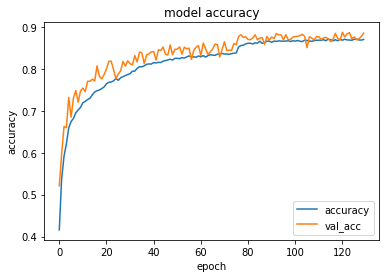

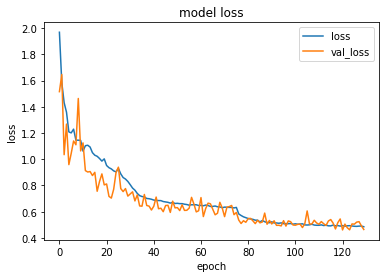

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['acc'],"-",label="accuracy")
    plt.plot(history.history['val_acc'],"-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'],"-",label="loss",)
    plt.plot(history.history['val_loss'],"-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.show()
# modelに学習させた時の変化の様子をplot
plot_history(history)

In [5]:
# モデルとパラメーターの値を保存
# モデルをmodel.jasonとして保存
with open('model.json', 'w') as json_file:
    json_file.write(model.to_json())
# パラメーターをweight.h5として保存
model.save_weights('weight.h5')

In [6]:
from keras.models import model_from_json

# モデルの読み込み
model_r = model_from_json(open('model.json', 'r').read())
# 重みの読み込み
model_r.load_weights('weight.h5')

# Sequentialオブジェクトのコンパイル
model_r.compile(loss='categorical_crossentropy',
                optimizer= optimizers.rmsprop(lr=0.001,decay=1e-6),
                metrics=['accuracy'])

#testing
scores = model_r.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('Test result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

10000/10000 [==============================] - 72s 7ms/step
Test result: 88.590 loss: 0.464


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

# 描画を行う関数
def draw(X):
    plt.figure(figsize=(10, 10))# 描画エリアは10×10インチ
    pos = 1                     # 画像の描画位置を保持

    for i in range(X.shape[0]): # 画像の枚数だけ描画処理を繰り返す
        plt.subplot(4, 5, pos)  # 4×5の描画領域のpos番目の位置
        plt.imshow(X[i])        # インデックスiの画像を描画
        plt.axis('off')         # 軸目盛は非表示
        pos += 1
    plt.show()

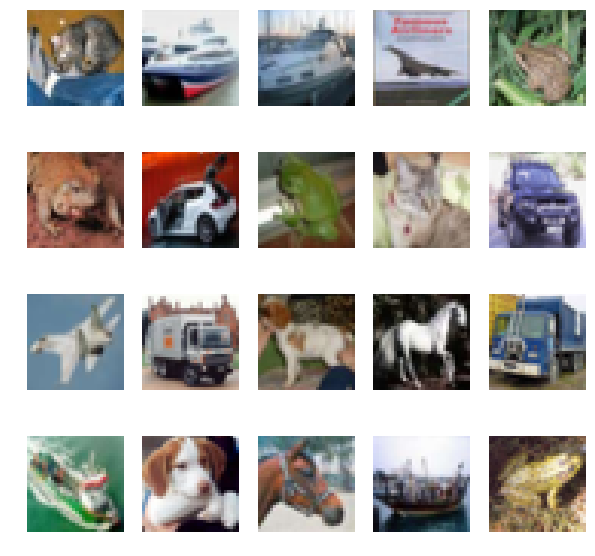

['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'ship', 'dog', 'truck', 'ship', 'frog']


In [15]:
# テストする画像の枚数
test_num = 20

# CIFAR-10データを読み込む
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# 先頭から20枚を描画
draw(x_test[:test_num])

# テストデータを標準化
x_test = x_test.astype('float32')
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_test = (x_test-mean)/(std+1e-7)
 
# 学習済みモデルを読み込む
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('weight.h5')

# 正解ラベルのテキスト
labels =  [
    'airplane','automobile','bird','cat',
    'deer','dog','frog','horse','ship','truck']
 
# 学習済みモデルで予測する
indices = np.argmax(model.predict(x_test[:test_num]),1)
print ([labels[x] for x in indices])